Setup Taxi-v3 environment importing Gym and import all dependecies. The documentation for OpenAI Gym is available here: https://gym.openai.com. In Taxi-v3, there are 4 locations (labeled by dierent letters) and your job is to pick up the passenger at one location and drop him off in another. You receive +20 points for a successful drop-off, and lose 1 point for every time step it takes. There is also a 10 point penalty for illegal pick-up and drop-off actions. You have 6 possible actions (Up, Down, Right, Left, Pick-up, Drop-off).

In [1]:
import gym #import open AI gym
import numpy as np #import numpy 
import matplotlib.pyplot as plt
env = gym.make("Taxi-v3") #Make Taxi-v3 environment. You can find documentation here: https://gym.openai.com/envs/Taxi-v3/
state = env.reset() #reset the state of the environment
print(state) # print the value of initial state
env.render() #render the environment

442
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Number of possible states and Number of possible actions

In [2]:
n_states = env.observation_space.n
print(n_states)
n_actions = env.action_space.n
print(n_actions)

500
6


Implement TD(0) algorithm to compute the value function of the randomized policy.

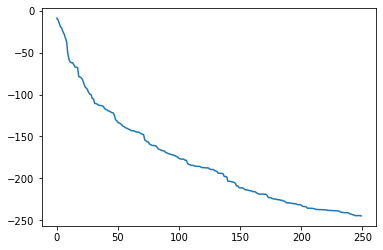

In [8]:
#initialization
V= np.zeros(n_states)#??? #initialize value function
alpha = 0.2 #??? # initialize alpha
gamma=0.99 # initailize gamma
episodes =250
V_Avg=np.zeros(episodes)
for episode in range(1,episodes+1):
  Termination = False
  counter=0
  state = env.reset() # initialize state
  
  while Termination != True:
    action = env.action_space.sample() #Take a random action, where action does not depends on state
    S2, R, done, info = env.step(action) #Take action and observe reward R and the next state S2
    # env.render()
    counter += 1 #update the iteration count

    # HW 4, fill up the codes here:  
    #update Value function using TD(0)  
    V[state] = V[state] + alpha*(R + gamma* V[S2] - V[state] )#???
    #update the state by following the randomized policy
    state = S2#???
    #R = 20 indicates a successful dropoff. 
    if (R==20):
      Termination = True
    
    
  
  V_Avg[episode-1]=np.mean(V)
plt.plot(V_Avg)

